## 5.1 Single Neuro Logistric Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Load the Pima Diabetes dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/diabetes.csv")



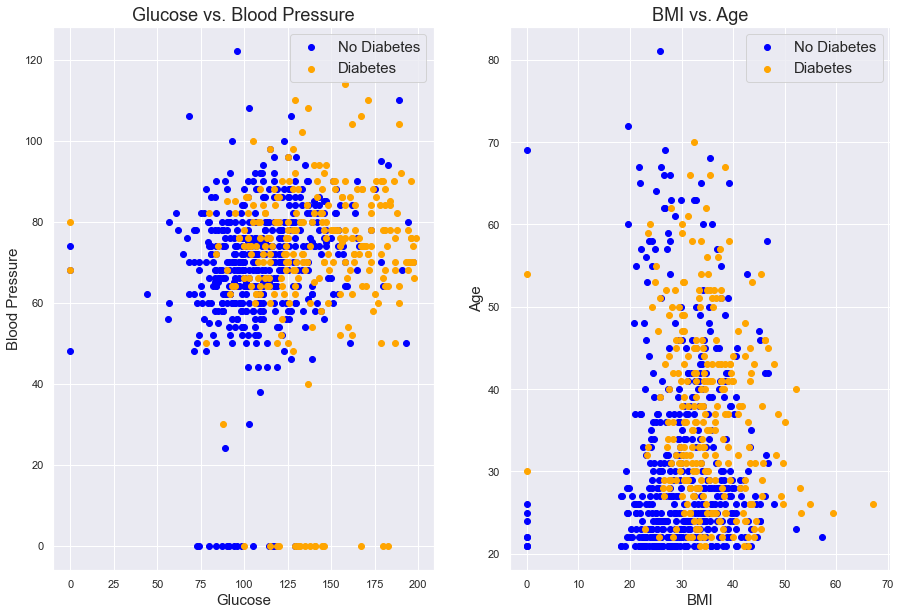

In [2]:
# Define categories based on diabetes outcome
negative = df[df['Outcome'] == 0]
positive = df[df['Outcome'] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Scatter plot for two features: Glucose and BloodPressure
ax1.scatter(negative['Glucose'], 
            negative['BloodPressure'], 
            color = "blue", 
            label = "No Diabetes")
ax1.scatter(positive['Glucose'], 
            positive['BloodPressure'], 
            color = "orange", 
            label = "Diabetes")
ax1.set_xlabel("Glucose", fontsize = 15)
ax1.set_ylabel("Blood Pressure", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper right")
ax1.set_title("Glucose vs. Blood Pressure", fontsize = 18)

# Scatter plot for another pair of features: BMI and Age
ax2.scatter(negative['BMI'], 
            negative['Age'], 
            color = "blue", 
            label = "No Diabetes")
ax2.scatter(positive['BMI'], 
            positive['Age'], 
            color = "orange", 
            label = "Diabetes")
ax2.set_xlabel("BMI", fontsize = 15)
ax2.set_ylabel("Age", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper right")
ax2.set_title("BMI vs. Age", fontsize = 18)

plt.show()


It seems like from the plotting, it's quite hard to seperate one from the other.

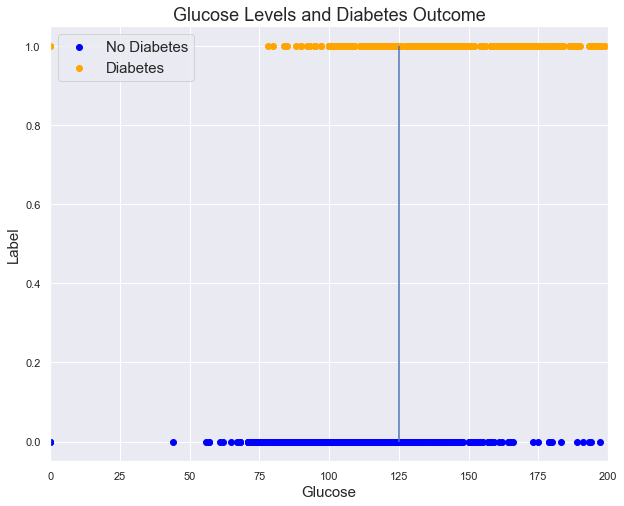

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains the Pima Diabetes dataset
negative = df[df['Outcome'] == 0]
positive = df[df['Outcome'] == 1]

plt.figure(figsize=(10, 8))
plt.xlim((0, 200))  # Adjust the limits to glucose levels observed in the dataset

# Scatter plot for glucose levels with diabetes outcome as labels
plt.scatter(negative['Glucose'], 
            np.zeros(len(negative)),  # Zeros for no diabetes
            color="blue", 
            label="No Diabetes")
plt.scatter(positive['Glucose'], 
            np.ones(len(positive)),  # Ones for diabetes
            color="orange", 
            label="Diabetes")

# Optional: add a vertical line if a threshold is observed in your data
# plt.vlines(threshold_glucose, 0.0, 1.0, color="green", linestyles="--")

plt.xlabel("Glucose", fontsize=15)
plt.ylabel("Label", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("Glucose Levels and Diabetes Outcome", fontsize=18)
plt.vlines(125, 0.0, 1.0)
plt.show()


### Discussion
In this plot, each point represents an individual's glucose level plotted against a binary outcome (0 for no diabetes, 1 for diabetes). This visualization helps to highlight the overlap between the two categories and can illustrate the difficulty in using a simple linear separator to distinguish between individuals with and without diabetes based on glucose alone.

The sigmoid activation fuction

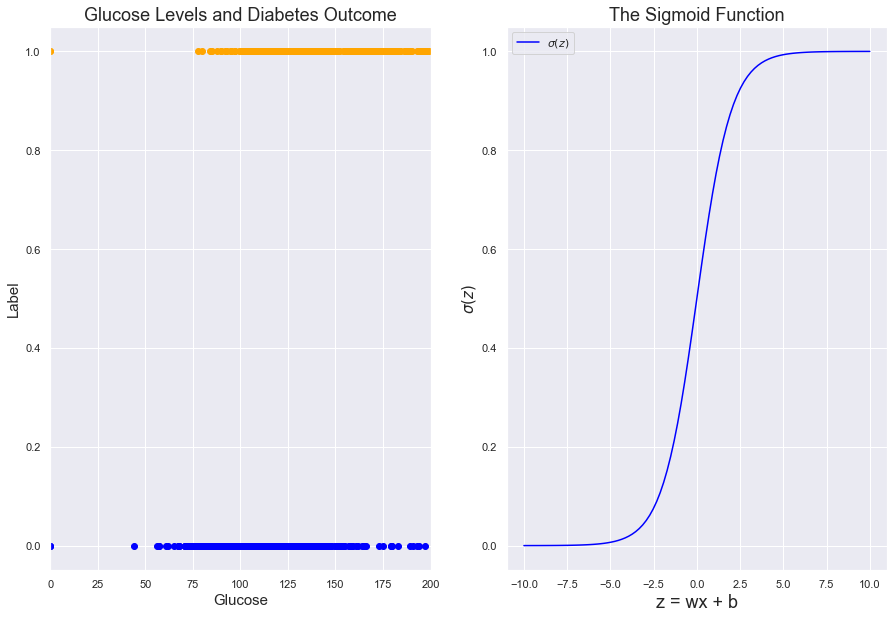

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains the Pima Diabetes dataset
negative = df[df['Outcome'] == 0]
positive = df[df['Outcome'] == 1]

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Adapt the limits to fit glucose levels from the Pima dataset
ax1.set_xlim((0, 200))
ax1.scatter(negative['Glucose'], 
            np.zeros(len(negative)), 
            color="blue", 
            label="No Diabetes")
ax1.scatter(positive['Glucose'], 
            np.ones(len(positive)), 
            color="orange", 
            label="Diabetes")
ax1.set_xlabel("Glucose", fontsize=15)
ax1.set_ylabel("Label", fontsize=15)
ax1.set_title("Glucose Levels and Diabetes Outcome", fontsize=18)

# Plot of the Sigmoid function
domain = np.linspace(-10, 10, 100)  # Adjusted domain to better visualize sigmoid curve
ax2.plot(domain, 
         sigmoid(domain), 
         color="blue", 
         label="$\sigma(z)$")
ax2.set_xlabel("z = wx + b", fontsize=18)
ax2.set_ylabel("$\sigma(z)$", fontsize=15)
ax2.set_title("The Sigmoid Function", fontsize=18)
ax2.legend()

plt.show()


We build a SingleNeuron function for logistic regression.

In [6]:
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha=0.005, epochs=50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                output = self.predict(xi)
                error = target - output
                self.w_[:-1] += alpha * error * xi
                self.w_[-1] += alpha * error
                errors += self.cost_function(target, output)
            self.errors_.append(errors / N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy(target, output):
        return -(target * np.log(output) + (1 - target) * np.log(1 - output))

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize=(10, 8))
        axs.plot(range(1, len(self.errors_) + 1), self.errors_, label="Cost function")
        axs.set_xlabel("Epochs", fontsize=15)
        axs.set_ylabel("Cost", fontsize=15)
        axs.legend(fontsize=15)
        axs.set_title("Cost Calculated after Each Epoch During Training", fontsize=18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize=(10, 8))
        plot_decision_regions(X, y, clf=self)
        plt.title("Neuron Decision Boundary", fontsize=18)
        plt.xlabel(xstring, fontsize=15)
        plt.ylabel(ystring, fontsize=15)
        plt.show()


### Training a Single Neuron for Diabetes Prediction

In this section of the code, we prepare and train a single artificial neuron to predict diabetes based on glucose levels. We use the glucose level as the sole input feature and the diabetes outcome (positive or negative) as the binary target variable.

#### Data Preparation
- **Input Feature (X)**: We use the 'Glucose' column from the Pima Diabetes dataset. This feature represents the glucose concentration a 2-hour oral glucose tolerance test.
- **Target Variable (y)**: The 'Outcome' column is used as the target variable. It contains binary values where 1 indicates the presence of diabetes and 0 indicates no diabetes.

#### Model Configuration
- **Activation Function**: We utilize the sigmoid function as the activation function. This function maps the neuron's input (a linear combination of the weighted inputs) to a probability between 0 and 1, suitable for binary classification.
- **Loss Function**: The cross-entropy loss function is used to quantify the error between the predicted values and the actual labels. This function is particularly effective for binary classification tasks as it penalizes incorrect classifications more heavily when the predicted probability diverges significantly from the actual label.

#### Training
- **Training Process**: We train the neuron using stochastic gradient descent (SGD). During training, the model iteratively adjusts its weights based on the gradient of the loss function to minimize error. We use a learning rate of `0.01` and train for `5,000` epochs to ensure adequate convergence.
- **Weight Initialization**: The neuron's weights are initially randomized, and biases are set to zero, which are then optimized through the training process.

#### Visualization
- **Cost Function Plot**: After training, we plot the cost function against the number of epochs. This plot helps in visualizing the decrease in training loss over time, indicating successful learning if the plot shows a downward trend.

This model serves as a basic demonstration of logistic regression using a single-layer neural network structure. The simplicity of this model makes it a great starting point for understanding the fundamentals of neural network training in binary classification tasks.


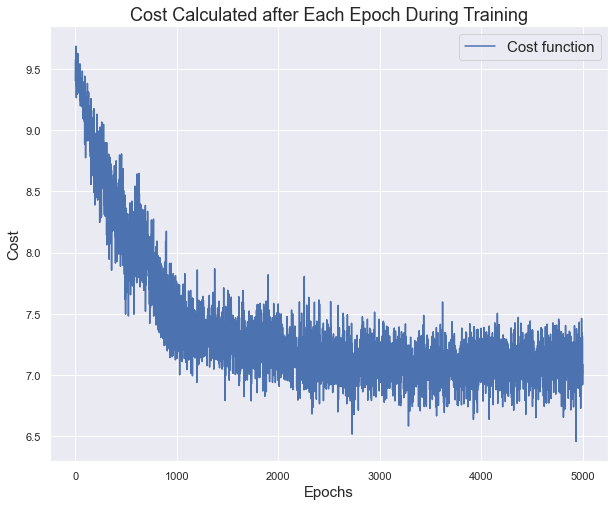

In [10]:
X = df['Glucose'].values
X = X.reshape(-1, 1)  # Reshaping for a single feature
y = df['Outcome'].values  # 'Outcome' should be 0 or 1

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cross-entropy loss function
def cross_entropy_loss(y_hat, y):
    # Prevent division by zero
    y_hat = np.clip(y_hat, 1e-9, 1 - 1e-9)
    return - y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

# Instantiate the neuron
node = SingleNeuron(sigmoid, cross_entropy_loss)

# Train the neuron
node.train(X, y, alpha=0.01, epochs= 5_000)

# Optional: Plot the cost function to check convergence
node.plot_cost_function()

### Visualizing the Logistic Regression Curve

This code snippet is designed to visualize the performance of a trained logistic regression model (implemented as a single neuron). The model predicts the probability of diabetes based on glucose levels from the Pima Diabetes dataset.

#### Visualization Details
- **Data Points**: The scatter plot represents individuals categorized into two groups: those with diabetes and those without. Individuals without diabetes are plotted at a y-value of 0, and those with diabetes at a y-value of 1.
- **Logistic Regression Curve**: The green curve represents the probabilities predicted by the logistic regression model across a range of glucose levels. This curve demonstrates how the likelihood of diabetes increases with glucose levels according to the model.

#### Axes and Labels
- **X-axis** (`Glucose Level`): Represents the glucose levels which are a crucial indicator used for diagnosing diabetes.
- **Y-axis** (`Probability / Label`): Indicates the binary outcome (0 for no diabetes, 1 for diabetes) and the predicted probability of diabetes as output by the model.

#### Interpretation
- The logistic curve is particularly useful for understanding the threshold levels of glucose that significantly increase the likelihood of diabetes according to the model's training. For instance, higher glucose levels where the curve approaches the value 1 indicate a higher probability of diabetes.
- The distinct separation between the two groups along with the logistic curve provides a clear visual illustration of how well the model is performing, highlighting regions where the model is certain or uncertain about the diabetes diagnosis.

This visualization is an effective tool for medical professionals and data scientists to evaluate the effectiveness of predictive models in healthcare diagnostics, specifically for diabetes prediction based on glucose levels.


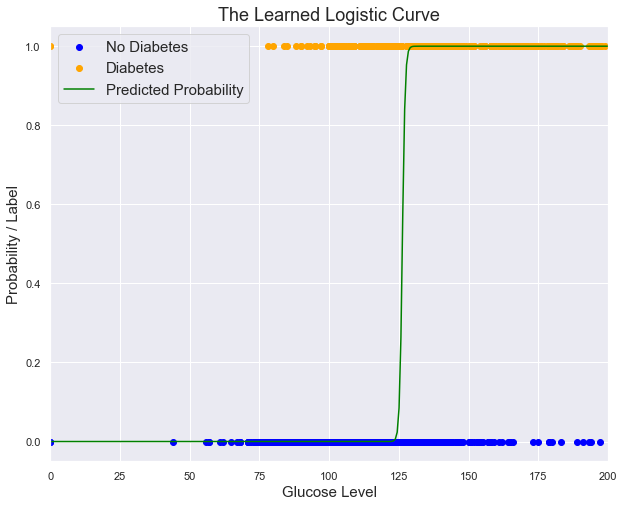

In [11]:
plt.figure(figsize=(10, 8))
plt.xlim((0, 200))  # Adjust the x-axis limits to span the range of glucose levels in the dataset

# Assuming `node` is your trained SingleNeuron model and `df` is your DataFrame
negative = df[df['Outcome'] == 0]
positive = df[df['Outcome'] == 1]

plt.scatter(negative['Glucose'], 
            np.zeros(len(negative)), 
            color="blue", 
            label="No Diabetes")
plt.scatter(positive['Glucose'], 
            np.ones(len(positive)), 
            color="orange", 
            label="Diabetes")

# Plotting the predicted probabilities from the neuron model
domain = np.linspace(0, 200, 300)
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color="green", label="Predicted Probability")

plt.xlabel("Glucose Level", fontsize=15)
plt.ylabel("Probability / Label", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("The Learned Logistic Curve", fontsize=18)
plt.show()


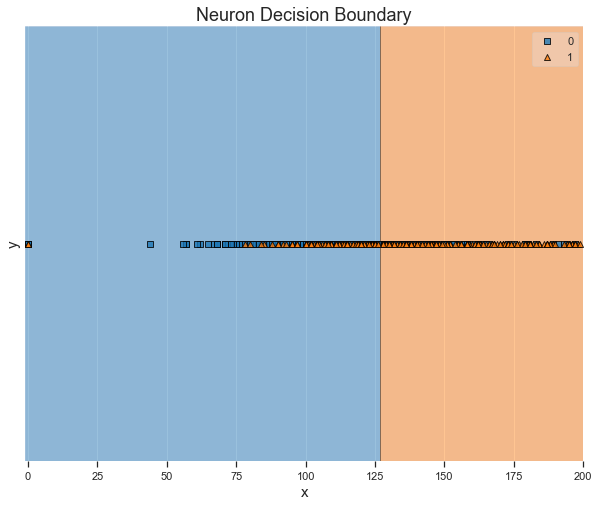

In [12]:
node.plot_decision_boundary(X, y)
plt.show()